# Modelling SEI growth on particle cracks

In [54]:
import pybamm
import matplotlib.pyplot as plt

We make 2 models:
1. With reaction limited SEI
2. With reaction limited SEI and growth of SEI on particle cracks enabled.

Particle mechanics define how the particle will behave - swell or swell+crack.

In [55]:
model_1 = pybamm.lithium_ion.DFN({"SEI":"solvent-diffusion limited", "particle mechanics": "swelling only"})

model_2 = pybamm.lithium_ion.DFN({"SEI":"solvent-diffusion limited", "particle mechanics": "swelling and cracking", "SEI on cracks": "true" })

For parameter values, we chose the OKane2022 parameters.

In [56]:
my_param = pybamm.ParameterValues("OKane2022")

To model particle cracking, we need a very fine mesh for particles. So we update the mesh points.

In [57]:
my_pts = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator
    "x_p": 20,  # positive electrode
    "r_n": 26,  # negative particle
    "r_p": 26,  # positive particle
}

In [58]:
my_exp = pybamm.Experiment(
    ["Hold at 4.2 V until C/100", 
    "Rest for 1 hour", 
    "Discharge at 1C until 2.5 V"]
)

In [59]:
sim_1 = pybamm.Simulation(model_1, parameter_values=my_param, var_pts=my_pts, experiment=my_exp)
sol_1 = sim_1.solve()

sim_2 = pybamm.Simulation(model_2, parameter_values=my_param, var_pts=my_pts, experiment=my_exp)
sol_2 = sim_2.solve()

In [60]:
print(model_1.variables.search("time"))

Results for 'time': ['Time [s]', 'Time [min]', 'Time [h]', 'Porosity times concentration [mol.m-3]', 'Negative electrode porosity times concentration [mol.m-3]', 'Separator porosity times concentration [mol.m-3]', 'Positive electrode porosity times concentration [mol.m-3]']
None


In [61]:
t_1 = sol_1["Time [h]"].entries
vol_1 = sol_1['Voltage [V]'].entries
lli_sei_1 = sol_1["Loss of lithium to negative SEI [mol]"].entries

t_2 = sol_2["Time [h]"].entries
vol_2 =sol_2['Voltage [V]'].entries
lli_sei_2 = sol_2["Loss of lithium to negative SEI [mol]"].entries
lli_cr_2 = sol_2["Loss of lithium to negative SEI on cracks [mol]"].entries

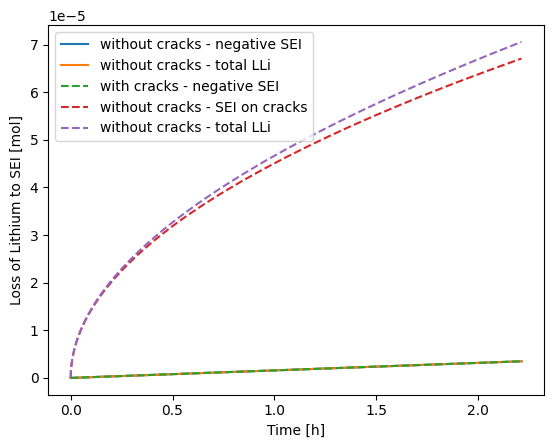

In [62]:
plt.figure()
plt.plot(t_1,lli_sei_1, label='without cracks - negative SEI')
plt.plot(t_1,lli_sei_1, label='without cracks - total LLi')
plt.plot(t_2, lli_sei_2, label='with cracks - negative SEI', linestyle="dashed")
plt.plot(t_2,lli_cr_2, label='without cracks - SEI on cracks', linestyle="dashed")
plt.plot(t_2,lli_sei_2+lli_cr_2, label='without cracks - total LLi', linestyle="dashed")
plt.xlabel("Time [h]")
plt.ylabel("Loss of Lithium to SEI [mol]")
plt.legend()
plt.show()

## Plot Explanation

1. SEI on cracks consume far more Li as compared to SEI on initial surface.